In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Loading the dataset


In [ ]:
df = pd.read_csv('indiarainfall.csv')

#Ploting the dataset

<Axes: xlabel='YEAR'>

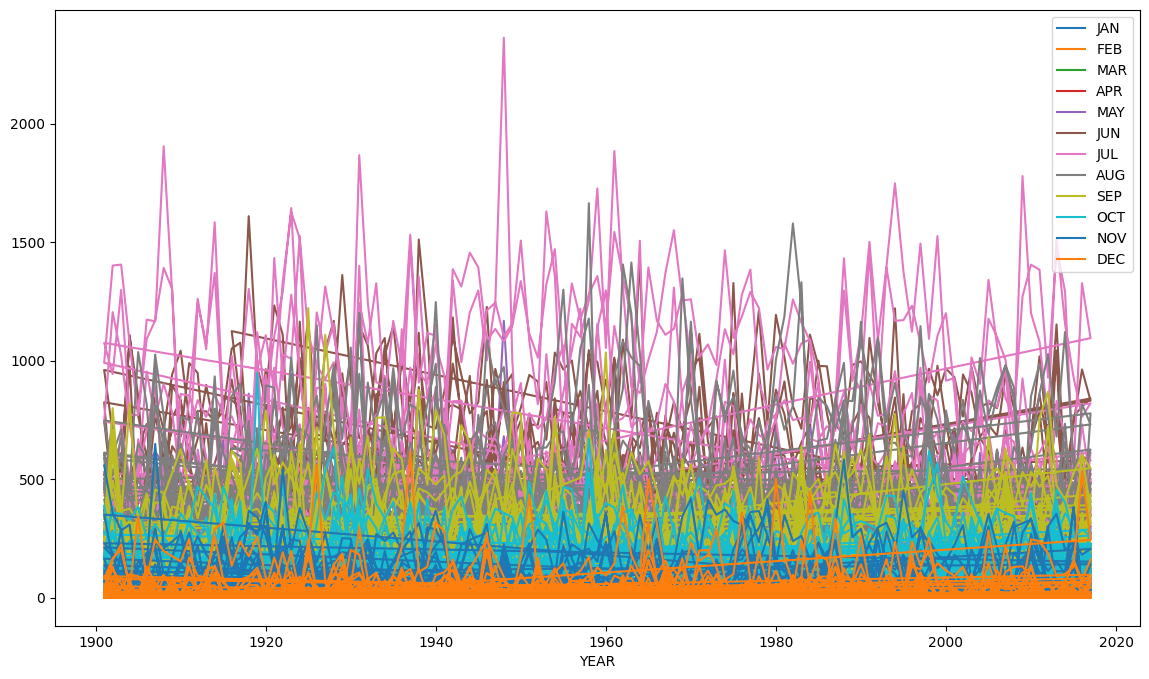

In [ ]:
df.plot(x='YEAR', y=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], figsize=(14, 8))


#plotting X,Y label


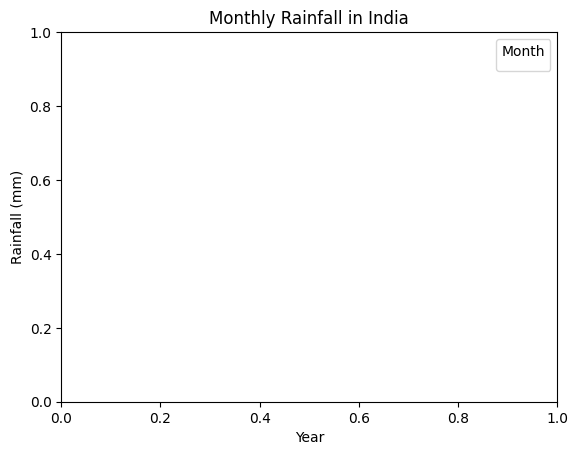

In [ ]:
plt.title('Monthly Rainfall in India')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.legend(title='Month')
plt.show()

#loading the annual column in annual rainfall function and print it...

In [ ]:
annual_rainfall = df['ANNUAL']
print(annual_rainfall)
cols=list(df)[14:15]


0       3373.2
1       3520.7
2       2957.4
3       3079.6
4       2566.7
         ...  
4183    1426.3
4184    1395.0
4185    1642.9
4186    1065.7
4187    1738.9
Name: ANNUAL, Length: 4188, dtype: float64


#plotting the dataset



<Axes: >

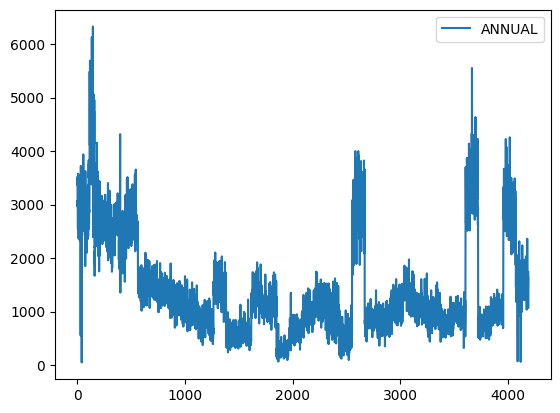

In [ ]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

#standardizing the targer column ANNUAL


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['ANNUAL']])
annual_rainfall_scaled = scaler.transform(df[['ANNUAL']])
print(annual_rainfall_scaled)

[[ 2.16429405]
 [ 2.3271326 ]
 [ 1.70525492]
 ...
 [ 0.2540598 ]
 [-0.38316334]
 [ 0.36004286]]


#Splitting the data set into two part one is test and one is train


In [ ]:

from sklearn.model_selection import train_test_split

# Lists for storing the training and testing data
trainX = []
trainY = []

n_past = 20  # 20 values will be considered to predict the next value

# Adding the values to trainX and trainY lists
for i in range(n_past, len(annual_rainfall_scaled)):
    trainX.append(annual_rainfall_scaled[i - n_past:i])
    trainY.append(annual_rainfall_scaled[i])

# Converting into numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, shuffle=False)

print('X_train shape == {}'.format(X_train.shape))
print('y_train shape == {}'.format(y_train.shape))
print('X_test shape == {}'.format(X_test.shape))
print('y_test shape == {}'.format(y_test.shape))


X_train shape == (3334, 20, 1)
y_train shape == (3334, 1)
X_test shape == (834, 20, 1)
y_test shape == (834, 1)


#creating the model and display it

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))

from keras.regularizers import l2

# Add L2 regularization to Dense layers
model.add(Dense(trainY.shape[1], kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(trainY.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,667 (147.14 KB)

 Trainable params: 37,667 (147.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=20, validation_split=0.1, verbose=1)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.4478 - val_loss: 0.2415
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2244 - val_loss: 0.2263
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1994 - val_loss: 0.2218
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1838 - val_loss: 0.2226
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.1649 - val_loss: 0.2000
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1751 - val_loss: 0.1983
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.1720 - val_loss: 0.1934
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.1653 - val_loss: 0.2057
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.1551 - val_loss: 0.1883
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.1453 - val_loss: 0.1815
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.1494 - val_loss: 0.1798
Epoch 12/100
188/188 ━━━

#Plot training & validation

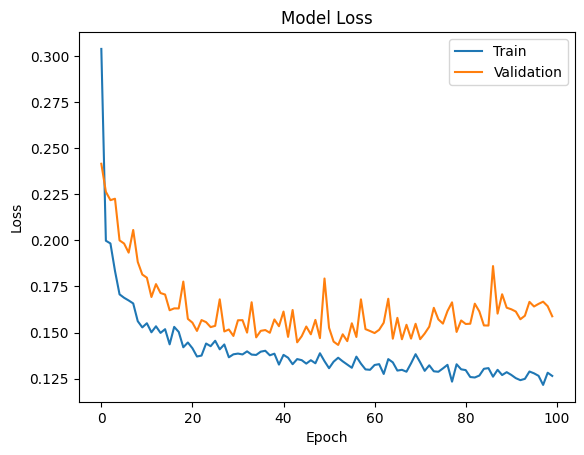

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#to calculate accuract

In [ ]:
# Evaluate the model on the test data


mse = model.evaluate(X_test, y_test)

# Print the MSE
print("Test MSE:", mse)
# Evaluate the model on training and testing data
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Print the MSE values
print("Training MSE:", train_loss)
print("Testing MSE:", test_loss)
#This code will print the Mean Squared Error (MSE)

from sklearn.metrics import r2_score

# Predict on training and validation sets
train_pred = model.predict(X_train)
val_pred = model.predict(X_test)

# Calculate R-squared (R^2) score for training and validation sets
train_r2 = r2_score(y_train, train_pred)
val_r2 = r2_score(y_test, val_pred)

# Print the R-squared (R^2) scores
print("Training R-squared (R^2) score:", train_r2)
print("Validation R-squared (R^2) score:", val_r2)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on training and validation sets
train_pred = model.predict(X_train)
val_pred = model.predict(X_test)

# Calculate evaluation metrics for training set
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
train_r2 = r2_score(y_train, train_pred)

# Calculate evaluation metrics for validation set
val_mae = mean_absolute_error(y_test, val_pred)
val_rmse = mean_squared_error(y_test, val_pred, squared=False)
val_r2 = r2_score(y_test, val_pred)

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R-squared'],
    'Training': [train_mae, train_rmse, train_r2],
    'Validation': [val_mae, val_rmse, val_r2]
})

# Print the accuracy table
print(metrics_df)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1066
Test MSE: 0.14996781945228577
Training MSE: 0.10196854919195175
Testing MSE: 0.14996781945228577
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Training R-squared (R^2) score: 0.8871922334713794
Validation R-squared (R^2) score: 0.8899146141424674
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
      Metric  Training  Validation
0        MAE  0.219411    0.254310
1       RMSE  0.316324    0.384786
2  R-squared  0.887192    0.889915


#Description of the final result plot

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.preprocessing import StandardScaler
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 100
n_days_for_prediction=100

#predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
#years = [date.year for date in predict_period_dates]
start_year = 2024
end_year = 2034  # Predicting for the next 10 years

# Generate a list of dates for the extended prediction period
extended_predict_period_dates = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq=us_bd).tolist()

#print(years)

# make prediction
#prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
# Make predictions for the extended prediction period
#print(extended_predict_period_dates)
extended_prediction = model.predict(trainX[-len(extended_predict_period_dates):])
#print(len(extended_prediction))
#print(prediction)
#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions

extended_prediction_copies = np.repeat(extended_prediction, training_df.shape[1], axis=-1)
y_pred_extended = scaler.inverse_transform(extended_prediction_copies)[:, 0]
#print(y_pred_extended)
df_extended_forecast = pd.DataFrame({'YEAR': [date.year for date in extended_predict_period_dates],
                                    # "Month" : [date.month for date in extended_predict_period_dates],
                                     'ANNUAL': y_pred_extended})

df_list = df_extended_forecast.values.tolist()
predictions = []
year = []

for i in range (start_year, end_year+1):
  count = 0
  data= []
  for j in range(len(df_list)):
    if int(df_list[j][0]) == i:
      data.append(df_list[j][1])
      count +=1
  actual_rain = sum(data)/len(data)
  #print(count)
  predictions.append(actual_rain)
  year.append(i)
#print(df_list)
#print(predictions)
#print(year)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


#Final plotting result


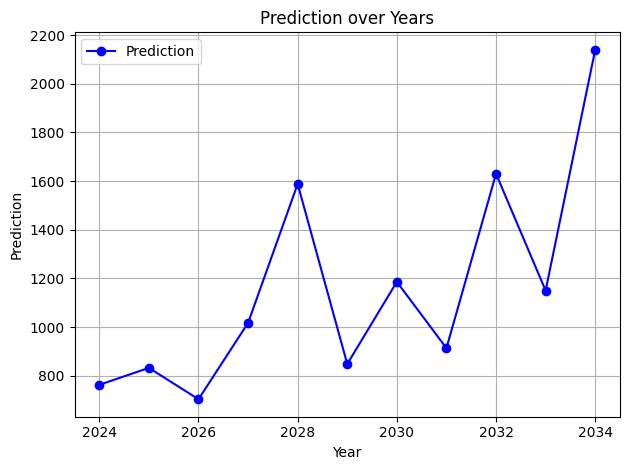

In [ ]:
import matplotlib.pyplot as plt


# Plotting the line graph
plt.plot(year, predictions, marker='o', color='blue', label='Prediction')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.title('Prediction over Years')

# Show plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()